In [1]:
import tensorflow as tf

In [2]:
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras import layers

In [15]:
import numpy as np
import pandas as pd

In [4]:
import matplotlib.pyplot as plt

In [66]:
(X_train,y_train),(X_test,y_test)=mnist.load_data()

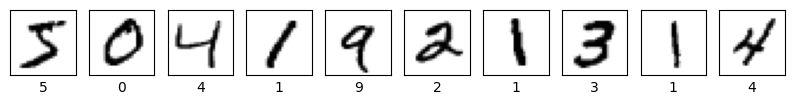

In [68]:
plt.figure(figsize=(10,5))
for i in range(10):
    plt.subplot(3,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_train[i],cmap=plt.cm.binary)
    plt.xlabel(y_train[i])    # Adding label as the value of handwritten digit

# Normalize


In [69]:
X_train=X_train.reshape(-1,28*28).astype('float32')/255.0

In [70]:
X_test=X_test.reshape(-1,28*28).astype('float32')/255.0

In [71]:
model=keras.Sequential(
    [
        keras.Input(shape=(784))
        ,layers.Dense(512,activation='relu')
        ,layers.Dense(256,activation='relu')
        ,layers.Dense(10)
]
)

model=keras.Model(inputs=model.inputs,outputs=[model.layers[-1].output])

model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True)
    ,optimizer=keras.optimizers.Adam(lr=0.001)
    ,metrics=['accuracy']
)

history=model.fit(X_train,y_train,batch_size=32,epochs=5,verbose=2)
model.evaluate(X_test,y_test,batch_size=32,verbose=2)


Epoch 1/5
1875/1875 - 5s - loss: 0.1871 - accuracy: 0.9437 - 5s/epoch - 3ms/step
Epoch 2/5
1875/1875 - 5s - loss: 0.0796 - accuracy: 0.9741 - 5s/epoch - 3ms/step
Epoch 3/5
1875/1875 - 4s - loss: 0.0546 - accuracy: 0.9830 - 4s/epoch - 2ms/step
Epoch 4/5
1875/1875 - 4s - loss: 0.0419 - accuracy: 0.9865 - 4s/epoch - 2ms/step
Epoch 5/5
1875/1875 - 5s - loss: 0.0328 - accuracy: 0.9886 - 5s/epoch - 3ms/step
313/313 - 1s - loss: 0.0682 - accuracy: 0.9829 - 623ms/epoch - 2ms/step


[0.06822901964187622, 0.9829000234603882]

In [72]:
model_history = pd.DataFrame(data=history.history)
model_history['epoch']=history.epoch
model_history

,loss,accuracy,epoch
0,0.187120,0.943733,0
1,0.079601,0.974067,1
2,0.054568,0.982967,2
3,0.041917,0.986550,3
4,0.032792,0.988617,4


In [88]:
predict=model.predict(X_test)
print(predict)

313/313 [==============================] - 1s 3ms/step
[[ -6.201369     0.43451494  -0.7373243  ...  16.195232    -5.5102816
   -0.44526124]
 [ -7.3922415    2.4407117   23.76108    ... -10.067968    -6.5619674
  -16.022364  ]
 [ -9.627813    14.117366    -1.2298249  ...   1.1231214   -2.20046
   -6.8480945 ]
 ...
 [-14.539018    -6.921693    -7.3053184  ...   0.9848337   -6.613947
    2.6192646 ]
 [ -5.2522173   -6.8378224  -12.509099   ...  -6.6058273    4.319494
   -4.7572656 ]
 [ -8.246897   -12.623085   -10.310366   ... -25.605074    -3.9404364
  -10.5887785 ]]


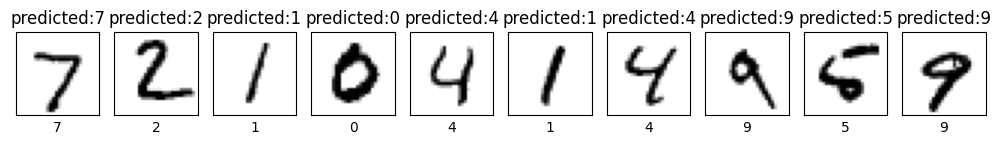

In [116]:
plt.figure(figsize=(10,7))
for i in range(10):
  predicted_labels = np.argmax(predict, axis=1) #get max value in array (max value can be high accuracy)
  image = X_test[i].reshape(28, 28)
  plt.subplot(3,10,i+1)
  plt.imshow(image,cmap=plt.cm.binary)
  plt.xticks([])
  plt.yticks([])
  plt.title(f'predicted:{predicted_labels[i]}')
  plt.xlabel(y_test[i])
  plt.subplots_adjust(wspace=5)
  plt.tight_layout()

In [120]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

Text(70.72222222222221, 0.5, 'y_true')

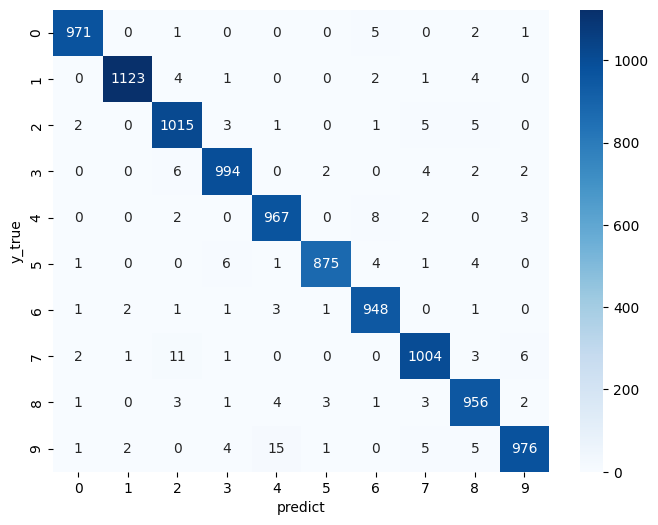

In [122]:
confusion=confusion_matrix(y_test,predicted_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues')
plt.xlabel('predict')
plt.ylabel('y_true')